In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [ ]:
def EpsilonGreedy(variance,NoOfTimeSteps,NoOfRuns,NoOfArms,epsilon):
  ExpectedReward=[0]*(NoOfTimeSteps)
  # AverageAbsoluteError=[0]*(NoOfTimeSteps)
  # OptimalArmChosen=[0]*(NoOfTimeSteps)
  for j in range(NoOfRuns):
    ActualQ=[]
    for i in range(NoOfArms):
      ActualQ.append(np.random.normal(0,1))
    OptimalArm=np.argmax(ActualQ)
    EstimatedQ=[0]*NoOfArms
    NoOfTimesChosen=[0]*NoOfArms
    for i in range(NoOfTimeSteps):
      x=random.random()
      if x>1-epsilon:
        ChosenArm=int((random.random()*10))
      else:
        ChosenArm=np.argmax(EstimatedQ)
      # if ChosenArm==OptimalArm:
      #   OptimalArmChosen[i]+=1
      CurrentReward=np.random.normal(ActualQ[ChosenArm],variance**(1/2))
      # error=abs(CurrentReward-EstimatedQ[ChosenArm])
      NoOfTimesChosen[ChosenArm]+=1
      EstimatedQ[ChosenArm]+=(CurrentReward-EstimatedQ[ChosenArm])/NoOfTimesChosen[ChosenArm]
      # AverageAbsoluteError[i]+=error
      ExpectedReward[i]+=CurrentReward
  for i in range(NoOfTimeSteps):
    ExpectedReward[i]/=NoOfRuns
    # AverageAbsoluteError[i]/=NoOfRuns
    # OptimalArmChosen[i]*=(100/NoOfRuns)
  return ExpectedReward


In [ ]:
def UCB(variance,NoOfTimeSteps,NoOfRuns,NoOfArms,c):
  ExpectedReward=[0]*(NoOfTimeSteps)
  # AverageAbsoluteError=[0]*(NoOfTimeSteps)
  # OptimalArmChosen=[0]*(NoOfTimeSteps)
  for j in range(NoOfRuns):
    ActualQ=[]
    for i in range(NoOfArms):
      ActualQ.append(np.random.normal(0,1))
    OptimalArm=np.argmax(ActualQ)
    EstimatedQ=[0]*NoOfArms
    NoOfTimesChosen=[0]*NoOfArms
    for i in range(NoOfTimeSteps):
      chosenArm=0
      if 0 in NoOfTimesChosen:
        for y in range(NoOfArms):
          if NoOfTimesChosen[y]==0:
            ChosenArm=y
            break
      else:
        ChosenArm=np.argmax(EstimatedQ + c * np.sqrt(np.log(i+1)/NoOfTimesChosen))
      # if ChosenArm==OptimalArm:
      #   OptimalArmChosen[i]+=1
      CurrentReward=np.random.normal(ActualQ[ChosenArm],variance**(1/2))
      # error=abs(CurrentReward-EstimatedQ[ChosenArm])
      NoOfTimesChosen[ChosenArm]+=1
      EstimatedQ[ChosenArm]+=(CurrentReward-EstimatedQ[ChosenArm])/NoOfTimesChosen[ChosenArm]
      # AverageAbsoluteError[i]+=error
      ExpectedReward[i]+=CurrentReward
  for i in range(NoOfTimeSteps):
    ExpectedReward[i]/=NoOfRuns
    # AverageAbsoluteError[i]/=NoOfRuns
    # OptimalArmChosen[i]*=(100/NoOfRuns)
  return ExpectedReward


In [ ]:
ExpR1=EpsilonGreedy(1,1000,2000,10,0.1)
ExpR2=UCB(1,1000,2000,10,2)

In [ ]:
ExpR2

[0.04617379698927323,
 -0.02843828236323793,
 0.04331562392123107,
 0.07437274756406424,
 0.02589851425474365,
 0.01398115242661573,
 0.018555200367715276,
 -0.036751370214519345,
 0.005906262865732568,
 0.024352497059607278,
 1.0376518652753186,
 0.9620985254829459,
 0.8560979577354828,
 0.7940765969419832,
 0.8084523812893504,
 0.8275830402645596,
 0.7682390112736777,
 0.8198442735281686,
 0.7902096081484001,
 0.8179172211969609,
 0.8115090122815242,
 0.824714633147115,
 0.8738417621809457,
 0.8731299640293068,
 0.9049203886416788,
 0.8169344869427447,
 0.8901421145644486,
 0.9585656823743414,
 0.9442545843668597,
 0.8671642727021022,
 0.9024958157581789,
 0.9584992050597277,
 0.9212747616773214,
 0.9476500933720798,
 0.9857766300581969,
 0.99447643476809,
 0.9518470323192177,
 1.0612930713265414,
 1.0117056666842603,
 1.0363812564153234,
 1.0382640156909984,
 1.0542159418654677,
 1.0149711106698047,
 1.0348755028541443,
 1.0588024800440052,
 1.0318667539893385,
 1.0455856583012137,


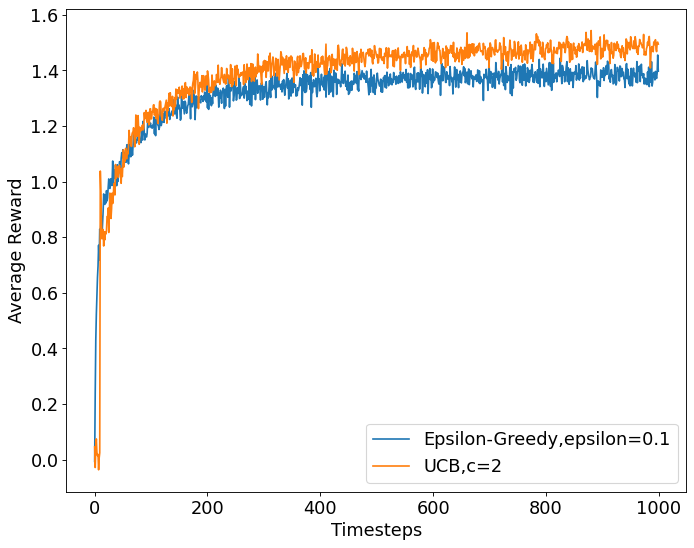

In [ ]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.plot(ExpR1)
plt.plot(ExpR2)
plt.xlabel("Timesteps")
plt.ylabel("Average Reward")
# plt.plot(ExpR_avg)
plt.legend(["Epsilon-Greedy,epsilon=0.1", "UCB,c=2"])
plt.show()

In [ ]:
ExpR3=UCB(1,1000,2000,10,1)
ExpR4=UCB(1,1000,2000,10,4)

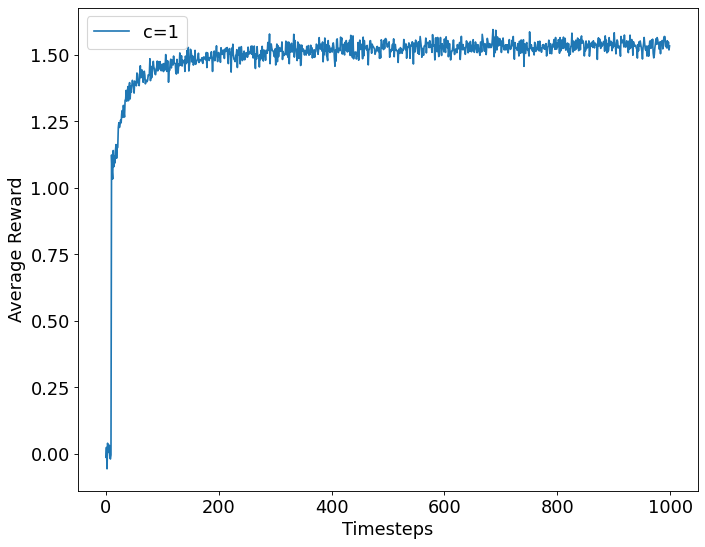

In [ ]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.plot(ExpR3)
plt.xlabel("Timesteps")
plt.ylabel("Average Reward")
# plt.plot(ExpR_avg)
plt.legend(["c=1"])

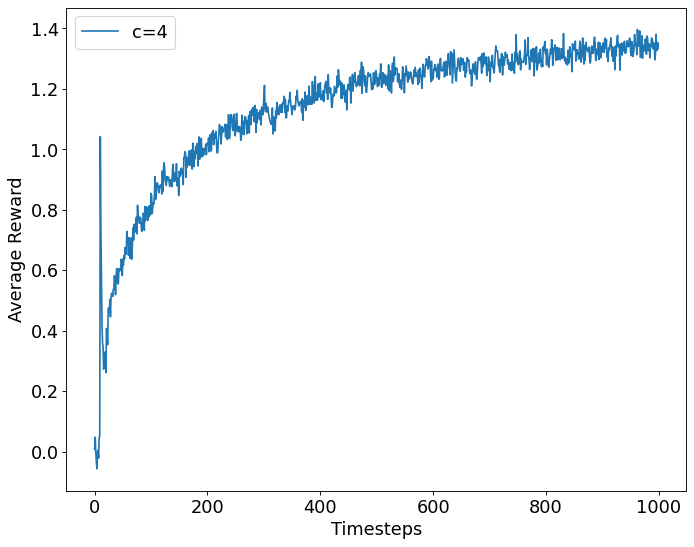

In [ ]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.plot(ExpR4)
plt.xlabel("Timesteps")
plt.ylabel("Average Reward")
# plt.plot(ExpR_avg)
plt.legend(["c=4"])

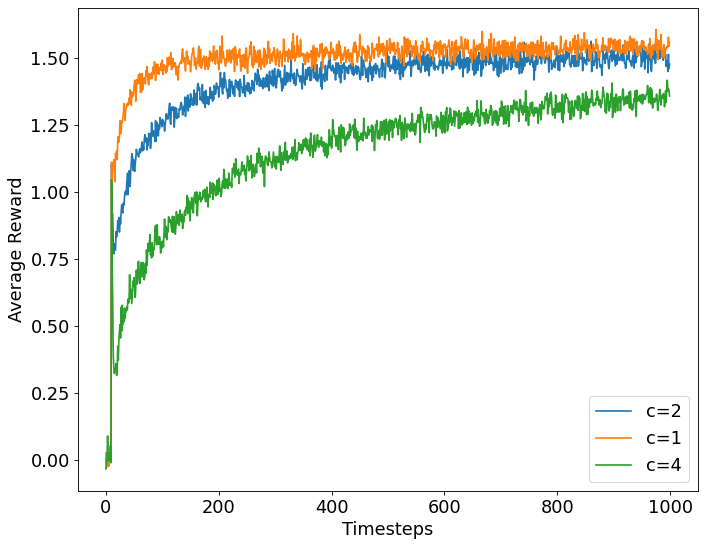

In [ ]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 16})
plt.plot(ExpR2)
plt.plot(ExpR3)
plt.plot(ExpR4)
plt.xlabel("Timesteps")
plt.ylabel("Average Reward")
# plt.plot(ExpR_avg)
plt.legend(["c=2", "c=1","c=4"])
plt.show()